<div dir=rtl>
در این فایل سعی داریم تا در راستای تکمیل شبیه‌سازی‌های گذشته، احتمال کنترل پذیرش، 
احتمال افزایش سرعت و امید ریاضی طول صف را به عنوان تابعی از آستانه افزایش سرعت بررسی کنیم. به این معنا که آستانه کنترل پذیرش را ثابت در نظر می‌گیریم و با تغییر آستانه افزایش سرعت، معیار‌های ذکر شده را محاسبه می‌کنیم. در نهایت نمودار تغییرات آن‌ها را در آستانه‌های متفاوت افزایش سرعت ترسیم خواهیم کرد. 
</div>

In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics

In [ ]:
lambda_L = 4
lambda_H = 7.5
mu_L = 0.2
mu_H = 0.286
N = 40
n = 0 
new_time = 0 
n_A = 0
n_D = 0
arrival_time_list = []
departure_time_list = []
n_list = []
time_list = []
na = 65
ns = np.arange(1,100,4)

In [ ]:
servers = []
for _ in range(N):
    servers.append(0)

In [ ]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [ ]:
probability_of_speedup_list = []
probability_of_admission_control_list = [ ]
expected_value_list = []

for i in ns:

    for _ in range (1000): 
    
        if n < na and n <i:

            lambda_ = lambda_H
            mu_ = mu_L


        elif n > na and n > i:

            lambda_ = lambda_L
            mu_ = mu_H


        elif n < i and n > na :

            lambda_ = lambda_L
            mu_ = mu_L

        elif n > i and n < na:

            lambda_ = lambda_H
            mu_ = mu_H




        time = np.random.exponential(1/((n*mu_)+ lambda_))
        #print(time)
        new_time += time
        time_list.append(new_time)
        #print(new_time)

        probability_of_arrival = lambda_ / ((n*mu_)+ lambda_)
        probability_of_departure = (n*mu_) / ((n*mu_)+ lambda_)
        events = ["arrival","departure"]
        distributioi = [probability_of_arrival,probability_of_departure]
        random_events = np.random.choice(events, 1, True, distributioi)
        #print(random_events)

        if random_events == "arrival":
            n += 1
            n_A += 1
            arrival_time = new_time
            arrival_time_list.append(arrival_time)
            servers.sort()
            servers[0] += 1

        elif random_events == "departure":

            n -= 1
            n_D += 1
            departure_time = new_time
            departure_time_list.append(departure_time)
            number_of_empty_servers = servers.count(0)
            alternative_servers = remove_values_from_list(servers,0)
            random_index = random.randint(0,len(alternative_servers)-1)
            alternative_servers[random_index] -= 1
            for _ in range(number_of_empty_servers):
                alternative_servers.append(0)
            servers = alternative_servers

        #print(n)
        n_list.append(n)


        new_time = time
        
    larger_elements = [element for element in n_list if element > na]
    number_of_elements = len(larger_elements)
    probability_of_admission_control = number_of_elements / len(n_list)

    probability_of_admission_control_list.append(probability_of_admission_control)


    larger_elements = [element for element in n_list if element > i]
    number_of_elements = len(larger_elements)
    probability_of_speedup = number_of_elements / len(n_list)


    probability_of_speedup_list.append(probability_of_speedup)
    
    # E (X - N) +
    element_list = []
    for element in n_list:
        element = max(0,element - N)
        element_list.append(element)
        expected_value = statistics.mean(element_list)
    
    expected_value_list.append(expected_value)

    


In [ ]:
print(probability_of_admission_control_list)
print(probability_of_speedup_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.999, 0.996, 0.995, 0.99475, 0.9836, 0.893, 0.6374285714285715, 0.3555, 0.1497777777777778, 0.0549, 0.022272727272727274, 0.009166666666666667, 0.0008461538461538462, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
print(expected_value_list)

[0, 0.005, 0.053, 0.03975, 0.0318, 0.0275, 0.023571428571428573, 0.02125, 0.021666666666666667, 0.0247, 0.08263636363636363, 0.21691666666666667, 0.3259230769230769, 0.4502857142857143, 0.5004666666666666, 0.5101875, 0.596764705882353, 0.6881111111111111, 0.732, 0.8032, 0.8488571428571429, 0.8784090909090909, 0.8525217391304348, 0.8525416666666666, 0.93664]


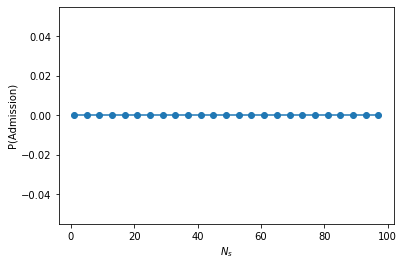

In [ ]:
plt.scatter(ns,probability_of_admission_control_list)
plt.plot(ns,probability_of_admission_control_list)
plt.xlabel("$N_s$")
plt.ylabel("P(Admission)")
plt.show()

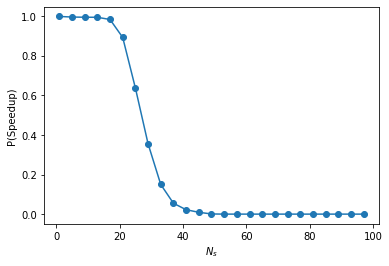

In [ ]:
plt.scatter(ns,probability_of_speedup_list)
plt.plot(ns,probability_of_speedup_list)
plt.xlabel("$N_s$")
plt.ylabel("P(Speedup)")
plt.show()

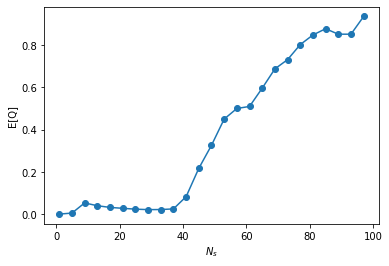

In [ ]:
plt.scatter(ns,expected_value_list)
plt.plot(ns,expected_value_list)
plt.xlabel("$N_s$")
plt.ylabel("E[Q]")
plt.show()

<div dir=rtl>
همان‌طور که می بینیم؛ همانند نمودار‌های ترسیم‌ ‌شده در مقاله با افزایش آستانه افزایش سرعت،  احتمال افزایش سرعت کاهش و امید ریاضی طول صف، افزایش پیدا کرده است. همچنین احتمال کنترل پذیرش، مقادیر صفر و یا نزدیک به صفر گرفته است. 
</div>

<div dir=rtl>
همچنین در ادامه قصد داریم تا میانگین هزینه را با تعیین مقادیری مشخص برای نرخ هزینه انتظار هر مشتری، نرخ هزینه افزایش سرعت و نرخ هزینه کنترل پذیرش، در مرتبه‌های مختلف محاسبه کنیم.

In [ ]:
ca = 100
cs = 100
cw = 100

In [ ]:
cost_of_admission_control = []
for ele in probability_of_admission_control_list:
    ele = ca * ele
    cost_of_admission_control.append(ele)   

In [ ]:
cost_of_admission_control

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
cost_of_speedup = []
for ele in probability_of_speedup_list:
    ele = cs * ele
    cost_of_speedup.append(ele)   

In [ ]:
cost_of_speedup

[99.9,
 99.6,
 99.5,
 99.47500000000001,
 98.36,
 89.3,
 63.74285714285715,
 35.55,
 14.977777777777778,
 5.489999999999999,
 2.2272727272727275,
 0.9166666666666666,
 0.08461538461538462,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
cost_of_expected = []
for ele in expected_value_list:
    ele = cw * ele
    cost_of_expected.append(ele)   

In [ ]:
cost_of_expected

[0,
 0.5,
 5.3,
 3.975,
 3.18,
 2.75,
 2.357142857142857,
 2.125,
 2.166666666666667,
 2.4699999999999998,
 8.263636363636364,
 21.691666666666666,
 32.59230769230769,
 45.02857142857143,
 50.04666666666666,
 51.018750000000004,
 59.6764705882353,
 68.81111111111112,
 73.2,
 80.32000000000001,
 84.88571428571429,
 87.8409090909091,
 85.25217391304348,
 85.25416666666666,
 93.664]

In [ ]:
main_cost_list = []
for i in range(len(cost_of_expected)):
    
    main_cost = cost_of_admission_control[i] + cost_of_speedup [i] + cost_of_expected [i]
    main_cost_list.append(main_cost)
    

In [ ]:
print(statistics.mean(main_cost_list))

66.45976574786113


In [ ]:
first_sub_main_cost_list = []
for i in range(len(cost_of_expected)):
    
    main_cost = cost_of_admission_control[i] + cost_of_speedup [i] + cost_of_expected [i]
    first_sub_main_cost_list.append(main_cost / N)
    

In [ ]:
print(statistics.mean(first_sub_main_cost_list))

1.661494143696528


In [ ]:
second_sub_main_cost_list = []
for i in range(len(cost_of_expected)):
    
    main_cost = cost_of_admission_control[i] + cost_of_speedup [i] + cost_of_expected [i]
    second_sub_main_cost_list.append(main_cost / math.sqrt(N))
    

In [ ]:
print(statistics.mean(second_sub_main_cost_list))

10.508211626224243
